<a href="https://colab.research.google.com/github/Shubham33320/Pneumonia-Detection-using-Deep-Learning/blob/main/Pneumonia_Detection_using_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [4]:
img_height,img_width= 256,256

train_ds=tf.keras.preprocessing.image_dataset_from_directory(directory= '/content/drive/MyDrive/chest_xray/train',
validation_split=0.2,
subset="training",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=12)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.


In [5]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(directory= '/content/drive/MyDrive/chest_xray/train',
validation_split=0.2,
subset="validation",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=12)

Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


In [6]:
class_names=train_ds.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [7]:
resnet_model= Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                                                 input_shape=(256,256,3),
                                                 pooling= 'avg',classes=5,weights='imagenet')

for layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(2,activation='softmax'))


94781440/94765736 [==============================] - 1s 0us/step


In [8]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [9]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
epochs=10
history=resnet_model.fit(x=train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
348/348 [==============================] - 1119s 3s/step - loss: 0.0956 - accuracy: 0.9624 - val_loss: 0.1586 - val_accuracy: 0.9425
Epoch 2/10
348/348 [==============================] - 1100s 3s/step - loss: 0.0691 - accuracy: 0.9727 - val_loss: 0.0599 - val_accuracy: 0.9770
Epoch 3/10
348/348 [==============================] - 1091s 3s/step - loss: 0.0533 - accuracy: 0.9794 - val_loss: 0.0472 - val_accuracy: 0.9789
Epoch 4/10
348/348 [==============================] - 1092s 3s/step - loss: 0.0473 - accuracy: 0.9823 - val_loss: 0.0680 - val_accuracy: 0.9703
Epoch 5/10
348/348 [==============================] - 1094s 3s/step - loss: 0.0485 - accuracy: 0.9801 - val_loss: 0.0816 - val_accuracy: 0.9626
Epoch 6/10
348/348 [==============================] - 2730s 8s/step - loss: 0.0442 - accuracy: 0.9811 - val_loss: 0.0520 - val_accuracy: 0.9751
Epoch 7/10
348/348 [==============================] - 1086s 3s/step - loss: 0.0350 - accuracy: 0.9851 - val_loss: 0.1723 - val_accuracy:

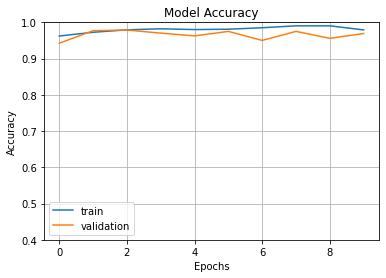

In [12]:
  fig1=plt.gcf()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.axis(ymin=0.4,ymax=1)
  plt.grid()
  plt.title('Model Accuracy')
  plt.ylabel("Accuracy")
  plt.xlabel('Epochs')
  plt.legend(['train','validation'])
  plt.show()

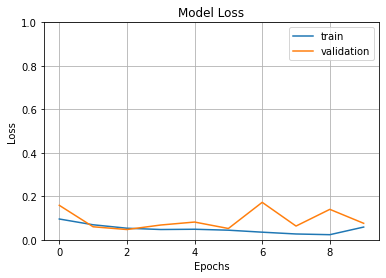

In [13]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

##Making Predictions

In [14]:
import cv2
image= cv2.imread("/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0003-0001.jpeg")
image_resized=cv2.resize(image,(img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 256, 256, 3)


In [15]:
pred=resnet_model.predict(image)
print(pred)

[[0.9975406  0.00245937]]


In [16]:
output_class=class_names[np.argmax(pred)]
print("THE PREDICTED CLASS IS",output_class)

THE PREDICTED CLASS IS NORMAL
